In [125]:
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath('..'))

In [171]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [127]:
import src.preprocessing as pre

In [128]:
meta, weekly_summary, mapping_dict = pre.load_tomato(planting_meta_path='../data/planting_meta.json', weekly_summary_path='../data/weekly_summary.csv')

In [129]:
meta

,TransplantDate,Year,WeekTransplanted,Ranch,Variety,Class,Type,Ha,WeekTransplanted_sin,WeekTransplanted_cos,ClimateSeries
2013-02-13_Felicity_ZJL_Z18_6_0.39,2013-02-13,2013,7,ZJL,Felicity,CHE,Cherry Rojo,0.3938,0.748511,0.663123,"[[-0.5605881878, -3.1935067896000002, -0.25850..."
2013-02-13_Shiren_ZJL_Z18_6_0.39,2013-02-13,2013,7,ZJL,Shiren,CHE,Cherry Rojo,0.3938,0.748511,0.663123,"[[-0.5605881878, -3.1935067896000002, -0.25850..."
2013-02-15_Amsterdam_ZJL_Z18_2_0.27,2013-02-15,2013,7,ZJL,Amsterdam,BSUF,Uva Roja,0.2700,0.748511,0.663123,"[[0.3146673828, -1.2573452111, -0.258501094600..."
2013-02-15_Felicity_ZJL_Z18_5_0.21,2013-02-15,2013,7,ZJL,Felicity,CHE,Cherry Rojo,0.2138,0.748511,0.663123,"[[0.3146673828, -1.2573452111, -0.258501094600..."
2013-02-15_Olivia_ZJL_Z18_2_0.54,2013-02-15,2013,7,ZJL,Olivia,BSUF,Uva Roja,0.5400,0.748511,0.663123,"[[0.3146673828, -1.2573452111, -0.258501094600..."
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-25_Top 2323_SGB_S12_4_0.15,2024-07-25,2024,30,SGB,Top 2323,CHE,Cherry Rosa,0.1530,-0.464723,-0.885456,"[[-0.0682569293, 0.9590502801, -0.258501094600..."
2024-07-25_Yoyomo_SGB_S12_4_0.1,2024-07-25,2024,30,SGB,Yoyomo,BSUF,Uva Amarilla,0.1020,-0.464723,-0.885456,"[[-0.0682569293, 0.9590502801, -0.258501094600..."
2024-07-29_King_SGB_S12_7_0.51,2024-07-29,2024,31,SGB,King,BSUF,Uva Roja,0.5100,-0.568065,-0.822984,"[[-0.2323673488, 0.3476308342, -0.258501094600..."
2024-07-29_King_SGB_S12_8_0.03,2024-07-29,2024,31,SGB,King,BSUF,Uva Roja,0.0306,-0.568065,-0.822984,"[[-0.2323673488, 0.3476308342, -0.258501094600..."


In [130]:
weekly_summary

,WeeksAfterTransplant,Kilos,Year,Brix
PlantingID,,,,
2013-02-13_Felicity_ZJL_Z18_6_0.39,11,176.0,2013,5.200000
2013-02-13_Felicity_ZJL_Z18_6_0.39,12,384.0,2013,5.700000
2013-02-13_Felicity_ZJL_Z18_6_0.39,13,1248.0,2013,5.500000
2013-02-13_Felicity_ZJL_Z18_6_0.39,14,1888.0,2013,6.200000
2013-02-13_Felicity_ZJL_Z18_6_0.39,15,3056.0,2013,6.500000
...,...,...,...,...
2024-07-29_Tymoty_SGB_S12_8_0.4,15,1460.0,2024,6.388596
2024-07-29_Tymoty_SGB_S12_8_0.4,16,1274.0,2024,6.388596
2024-07-29_Tymoty_SGB_S12_8_0.4,17,1128.0,2024,6.388596


In [131]:
df = weekly_summary.pivot(columns='WeeksAfterTransplant', values='Kilos')

In [155]:
df1 = pd.concat([meta[['Ranch', 'Class','Type','Variety','Year']],df], axis=1)

In [156]:
df2 = df1.groupby(['Ranch', 'Class','Type','Variety','Year']).sum(numeric_only=True)

In [158]:
df2['Kilos'] = df2.sum(axis=1)

In [170]:
df2.drop(columns=['Kilos']).sum()

1          32.0
2          48.0
3        1068.0
4        2832.0
5        5933.0
6        8029.0
7        4316.0
8       10047.0
9       47006.0
10     204682.0
11     679469.0
12    1483002.0
13    2287565.0
14    3191294.0
15    3600980.2
16    3643761.8
17    3324545.0
18    2797307.5
19    2118030.8
20    1150304.5
dtype: float64

 ...]

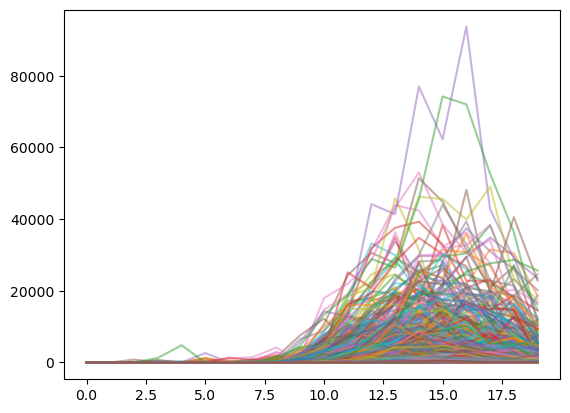

In [178]:
plt.plot(np.arange(20), df2.drop(columns=['Kilos']).T,alpha=0.5)

In [179]:
def logistic(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

In [191]:
from scipy.optimize import curve_fit
results = []
for i, row in df2.iterrows():
    total_kilos = row['Kilos']
    y = np.cumsum(row.drop('Kilos'))
    x = np.arange(20)
    k0 = total_kilos
    r0 = 0.01
    t0 = x[np.argmax(np.gradient(y))]
    p0 = [k0,r0,t0]
    try:
        popt,pcov = curve_fit(logistic,x,y,p0=p0)
    except:
        print(y)
    eigvals, eigvecs = np.linalg.eigh(pcov)  # safer than cholesky
    delta = 1.96 * (eigvecs @ np.sqrt(np.clip(eigvals, 0, None)) * np.ones(len(popt)))
    results.append([popt,delta])


    
    



1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20    55.0
Name: (OSF, BSUF, Uva Amarilla, Honey Bunch, 2017), dtype: float64
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20    1328.0
Name: (OSF, BSUF, Uva Roja, Ftm9733, 2016), dtype: float64
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14    624.0
15    640.0
16    640.0
17    640.0
18    640.0
19    640.0
20    640.0
Name: (OSF, CHE, Heirloom Cherry, Tangerina Grape, 2014), dtype: float64
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7  

[array([1.43777645e+03, 6.50033009e-01, 1.41613045e+01]),
 array([ 5.48391474e+01, -4.78562236e-03,  2.71087632e-01])]